# ipycytoscape: Interactive graphs

## A Jupyter - Cytoscape bridge

## https://github.com/cytoscape/ipycytoscape

A widget enabling interactive graph visualization with cytoscape.js in JupyterLab and
the Jupyter notebook.

- BSD-3-Clause License

**Installation:**

```bash
conda install -c conda-forge ipycytoscape
```

### ipycytoscape walkthrough

- cytoscape json
  - layouts
- pandas
  - styling
- networkx
  - directed and undirected graphs
  - creating custom elements
- neo4j
- interactiveness with ipywidgets

In [ ]:
%pip install -q ipycytoscape networkx
import ipycytoscape as cy

In [ ]:
cyGraph = cy.CytoscapeWidget()

### **cytoscape json**

In [ ]:
cytoscape_json = {
    "nodes": [
        {"data": {"id": "0", "name": "Cytoscape", "classes": "node"}},
        {"data": {"id": "1", "name": "Grid", "classes": "node"}},
        {"data": {"id": "2", "name": "Cola", "classes": "node"}},
        {"data": {"id": "3", "name": "Popper", "classes": "node"}},
        {"data": {"id": "4", "name": "Cytoscape.js", "classes": "node"}},
    ],
    "edges": [
        {"data": {"source": "4", "target": "0"}},
        {"data": {"source": "1", "target": "2"}},
        {"data": {"source": "1", "target": "3"}},
        {"data": {"source": "2", "target": "3"}},
        {"data": {"source": "4", "target": "4"}},
        {"data": {"source": "4", "target": "3"}},
    ],
}

All of the examples in this notebook are created in loco for sake of simplicity but it's
also possible to load them externaly in many different ways.

For an extensive description of all the attributes available on a cytoscape graph, check
the [cytoscape documentation](https://js.cytoscape.org/#cy.data).

In [ ]:
cyGraph.graph.add_graph_from_json(cytoscape_json)

In [ ]:
cyGraph

#### Layouts:

- cola
- dagre
- euler
- cose
- breadthfirst
- circle
- grid
- random
- null

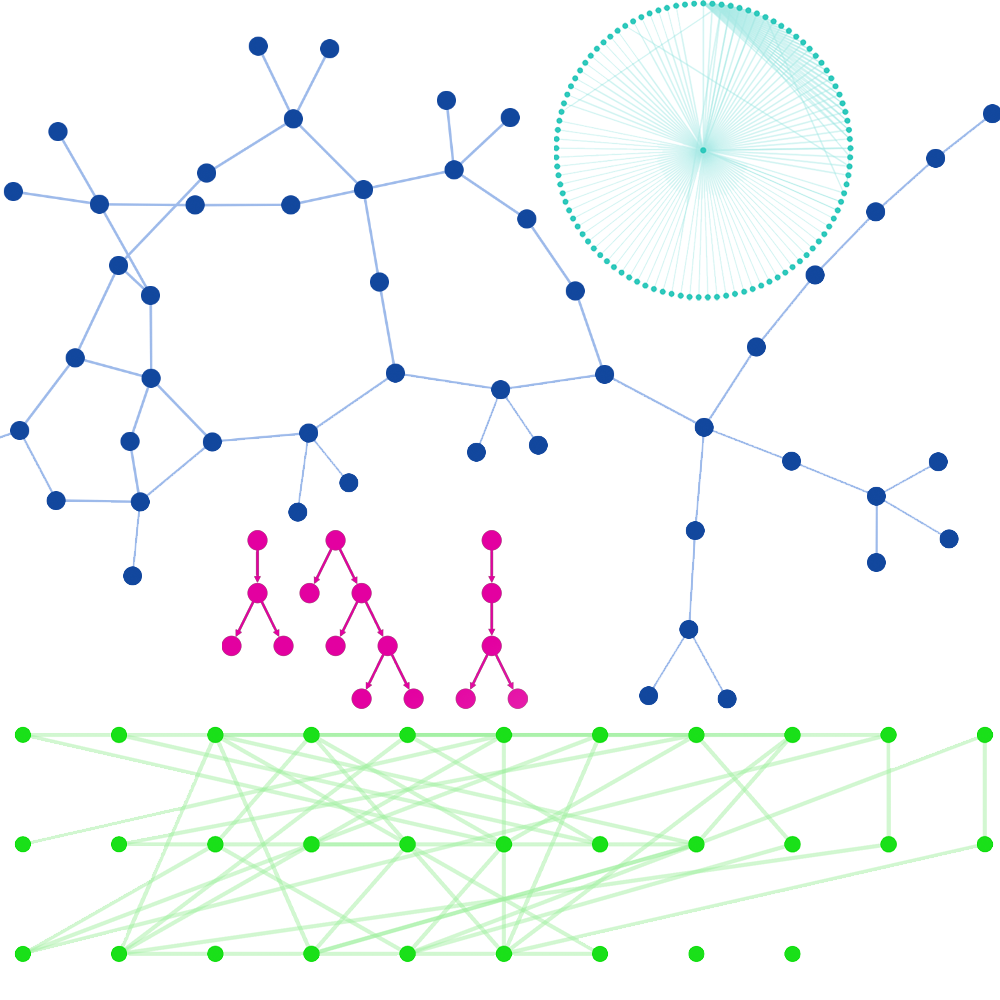

In [ ]:
cyGraph.set_layout(name="random")

In [ ]:
cyGraph

### **pandas**

In [ ]:
import pandas as pd

In [ ]:
pdCy = cy.CytoscapeWidget()

In [ ]:
robots = ["marvin", "c3po", "r2d2", "data"]
universe = ["douglas adams", "star wars", "star wars", "star trek"]
cooleness_lvl = ["10", "3", "10", "10"]
robotsRates = list(zip(robots, universe, cooleness_lvl))
df = pd.DataFrame(data=robotsRates, columns=["robot", "universe", "cooleness_lvl"])

In [ ]:
pdCy.graph.add_graph_from_df(df, ["universe"], ["robot", "cooleness_lvl"])

In [ ]:
pdCy

In [ ]:
pdCy.graph.nodes

In [ ]:
edge = cy.Edge(data={"source": 1, "target": 2})

In [ ]:
pdCy.graph.add_edge(edge)

In [ ]:
edge = cy.Edge(data={"source": "parent-2", "target": "parent-1"})
pdCy.graph.add_edge(edge)

In [ ]:
pdCy.graph.edges

#### **styling**

- layout
- style
- tooltips

In [ ]:
pdCy.set_style(
    [
        {
            "selector": 'node[name] *= ""',
            "style": {
                "background-color": "blue",
            },
        },
        {
            "selector": '[id *= "parent-1"]',
            "style": {
                "background-color": "yellow",
            },
        },
        {
            "selector": '[id *= "parent-2"]',
            "style": {"background-color": "red", "color": "blue"},
        },
    ]
)

In [ ]:
pdCy

More information about cytoscape selectors are available
[here](https://js.cytoscape.org/#selectors).

In [ ]:
pdCy.set_tooltip_source("name")

More examples of how to set labels and tooltips
[here](https://github.com/cytoscape/ipycytoscape/blob/master/examples/Text%20on%20node.ipynb)
and
[here](https://github.com/cytoscape/ipycytoscape/blob/master/examples/Tooltips%20example.ipynb).
Or online via
[binder](https://mybinder.org/v2/gh/QuantStack/ipycytoscape/stable?filepath=examples).

### **networkx**

In [ ]:
import networkx as nx

In [ ]:
nxCyGraph = cy.CytoscapeWidget()
nxGraph = nx.complete_graph(5)

In [ ]:
nxCyGraph.graph.add_graph_from_networkx(nxGraph)

In [ ]:
nxCyGraph

#### **directed and undirected graphs**

In [ ]:
directCyGraph = cy.CytoscapeWidget()
directNxGraph = nx.complete_graph(4)
directCyGraph.graph.add_graph_from_networkx(directNxGraph, directed=True)

In [ ]:
directCyGraph

In [ ]:
from random import random

In [ ]:
mixedNxGraph = nx.complete_graph(5)
for s, t, data in mixedNxGraph.edges(data=True):
    if random() > 0.5:
        mixedNxGraph[s][t]["classes"] = "directed"

mixedGraph = cy.CytoscapeWidget()
mixedGraph.graph.add_graph_from_networkx(mixedNxGraph)
mixedGraph

#### **Creating custom elements**

Custom Nodes and Edges can be created for any kinds of graphs, meaning it's not only
restricted to networkx objects. You just have to use the ipycytoscape API for that. We
see an example of the API's use on the Pandas example.

In [ ]:
class CustomNode(cy.Node):
    def __init__(self, name, classes=""):
        super().__init__()
        self.data["id"] = name
        self.classes = classes

In [ ]:
n1 = CustomNode("node 1", classes="first")
n2 = CustomNode("node 2", classes="second")

G = nx.Graph()

G.add_node(n1)
G.add_node(n2)

G.add_edge(n1, n2)

In [ ]:
customInheritedGraph = cy.CytoscapeWidget()
customInheritedGraph.graph.add_graph_from_networkx(G)
customInheritedGraph.graph.nodes

### **Neo4j**

Examples on how to run ipycytoscape with Neo4j can be found
[here](https://github.com/sbl-sdsc/neo4j-ipycytoscape) binder and a notebook
[here](https://binder.pangeo.io/v2/gh/sbl-sdsc/neo4j-ipycytoscape/master).

In [ ]:
# from py2neo import Graph
# cy.add_graph_from_neo4j(neo4j_graph)

### **interactvity and interoperability with ipywidgets**

- javascript events
  - DOM (elements, events)
- widgets interaction

In [ ]:
import ipywidgets as widgets

In [ ]:
cyGraph

In [ ]:
cyGraph.set_style([{"selector": "edge.highlighted", "css": {"line-color": "red"}}])

In [ ]:
btn = widgets.Button(description="red edges", disabled=False)


def btn_callback(b):
    for edge in cyGraph.graph.edges:
        edge.classes = " highlighted"


btn.on_click(callback=btn_callback)
display(btn)

In [ ]:
def paint_blue(event):
    auxNode = cyGraph.graph.nodes[int(event["data"]["id"])]
    auxNode.classes += " blue"


cyGraph.on("node", "click", paint_blue)

In [ ]:
cyGraph.set_style(
    [
        {"selector": "edge.highlighted", "css": {"line-color": "red"}},
        {
            "selector": "node.blue",
            "css": {"background-color": "blue"},
        },
    ]
)

In [ ]:
cyGraph

**List of events**

These events can be applied to either `nodes` or `edges` objects:

- **mousedown :** when the mouse button is pressed
- **mouseup :** when the mouse button is released
- **click :** after mousedown then mouseup
- **mouseover :** when the cursor is put on top of the target
- **mouseout :** when the cursor is moved off of the target
- **mousemove :** when the cursor is moved somewhere on top of the target
- **touchstart :** when one or more fingers starts to touch the screen
- **touchmove :** when one or more fingers are moved on the screen
- **touchend :** when one or more fingers are removed from the screen
- **tapstart :** normalised tap start event (either mousedown or touchstart)
- **vmousedown :** alias for 'tapstart'
- **tapdrag :** normalised move event (either touchmove or mousemove)
- **vmousemove :** alias for 'tapdrag'
- **tapdragover :** normalised over element event (either touchmove or
  mousemove/mouseover)
- **tapdragout :** normalised off of element event (either touchmove or
  mousemove/mouseout)
- **tapend :** normalised tap end event (either mouseup or touchend)
- **vmouseup :** alias for 'tapend'
- **tap :** normalised tap event (either click, or touchstart followed by touchend
  without touchmove)
- **vclick :** alias for 'tap'
- **taphold :** normalised tap hold event
- **cxttapstart :** normalised right-click mousedown or two-finger tapstart
- **cxttapend :** normalised right-click mouseup or two-finger tapend
- **cxttap :** normalised right-click or two-finger tap
- **cxtdrag :** normalised mousemove or two-finger drag after cxttapstart but before
  cxttapend
- **cxtdragover :** when going over a node via cxtdrag
- **cxtdragout :** when going off a node via cxtdrag
- **boxstart :** when starting box selection
- **boxend :** when ending box selection
- **boxselect :** triggered on elements when selected by box selection
- **box :** triggered on elements when inside the box on boxend

# Exercise

### 1) Create another instance of the cyGraph object

### 2) Create a button widget, that when clicked, paints the graph's nodes yellow